# The Binary Classification Problem

So far I've covered Neural Networks in the context of regression, i.e. approximating continous functions. However in the real world many use cases require approximating functions with discrete values. Classic examples of this are things like image detection, such as "does a patient have breast cancer or not?" To give a better example of this, I will introduce a dataset that we can examine prior to getting into the details of how to tackle this problem.

## The Breast Cancer dataset
To work with this we will need to use sklearn's breast cancer dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load the breast_cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [2]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

We can see here that the dataset's feature values are continuous and the labels are discrete. So how can we approximate the labels using the features? The first step is luckily something I've covered before. The sigmoid function, recall that it has the convenient property of clamping any value in $\mathbb{R}$ between the interval [0,1]. That means that by defining a neural network similarly to how we did under Linear Regression but applying the sigmoid function as an activation to the final layer, the neural network can be treated as a function that estimates the probability that a feature vecttor corresponds to a 1. In this particular case 1 represents the boolean answer to the question "Does the patient have breast cancer?".

In [4]:
def sigmoid(x):
    return np.exp(x) / ( 1 + np.exp(x))
    

Text(0, 0.5, 'sigmoid(x)')

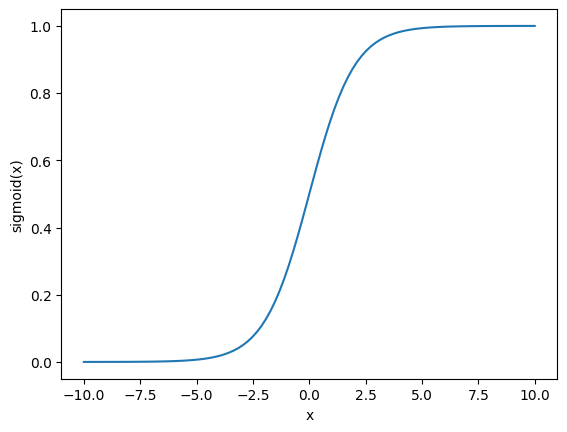

In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
# graphing the sigmoid function
fa = np.linspace(-10, 10, 100) 


a = sigmoid(fa)
plt.plot(fa, a) 
plt.xlabel("x") 
plt.ylabel("sigmoid(x)")

## The loss function in binary classification

The probability estimation given by the output of the neural network's forward pass is nice, but how do we optimize the network? How do we perform gradient descent on the network if it's giving probabilities, the MSE loss won't work because the loss will always be tiny. At most the loss will only ever be 1, and if the neural consistently guesses .5 the loss function will be .25 for values of both 0 and 1. The main solution to this problem is the Binary Cross Entropy Loss Function.

### The Binary Cross Entropy Loss Function
The binary cross entropy loss can be defined as $$L = - [y \cdot \ln (\hat{y}) + (1 - y) \cdot \ln( 1 - \hat{y})]$$
Where $ln$ refers to the natural log and $\hat{y}$ refers to the output of the neural network with the sigmoid function applied to it. 

Text(0, 0.5, 'natual log(x)')

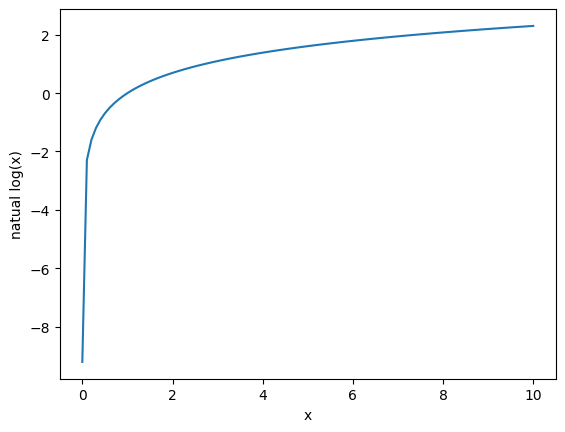

In [6]:
#graphing the natural log function
fa = np.linspace(1e-4, 10, 100) 


a = np.log(fa)
plt.plot(fa, a) 
plt.xlabel("x") 
plt.ylabel("natual log(x)")

The cross entropy loss gives a much better identification of how "off" a model from the target, while also being continuous, when $$y = 1,\hat{y} = .5, L = .693$$
$$y = 0,\hat{y} = .5, L = .693$$

The values are still small at $.5$ but it is at least a higher penalty than $.25$ with MSE, furthermore the true value of the Cross Entropy loss lies closer to 0 and one when $$y = 1, \hat{y} = .1 , L = 2.3$$ $$y = 0,\hat{y} = .1 , L =.10$$

### Graphing the difference between MSE and Binary Cross entropy

To get a better understanding of what is going on, I've provided a graph showing how the Binary Cross Entropy Loss function looks vs the MSE Loss

In [7]:
def cross_entropy_loss(y,y_hat):
    return -np.mean(y * np.log(y_hat) + ( 1 - y) * np.log(1 - y_hat))

In [8]:
def mse_loss(targets,outputs):
    return np.mean((targets - outputs) ** 2)


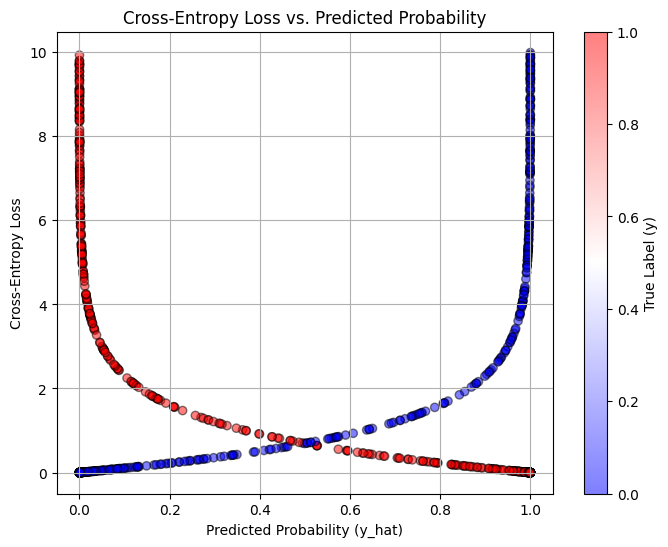

Average Cross-Entropy Loss: 0.0026


In [9]:
import matplotlib.pyplot as plt 
import numpy as np 

num_samples = 1000


y = np.random.randint(0, 2, size=num_samples)


raw_predictions = np.random.uniform(-10, 10, size=num_samples)

y_hat = sigmoid(raw_predictions)


loss = - (y * np.log(y_hat) + ( 1 - y) * np.log(1 - y_hat))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_hat, loss, alpha=0.5, c=y, cmap='bwr', edgecolors='k', label='Loss per sample')
plt.xlabel("Predicted Probability (y_hat)") 
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy Loss vs. Predicted Probability")
plt.colorbar(scatter, label='True Label (y)')
plt.grid(True)
plt.show()

average_loss = cross_entropy_loss(y, y_hat) / num_samples
print(f"Average Cross-Entropy Loss: {average_loss:.4f}")


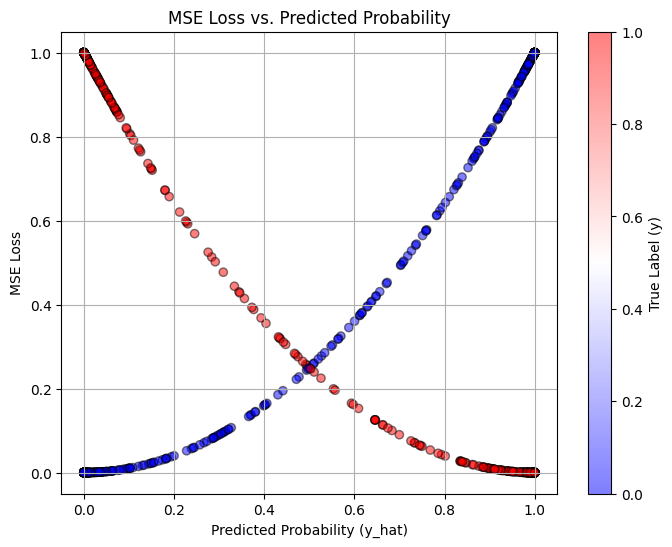

Average MSE Loss: 0.0005


In [10]:
import matplotlib.pyplot as plt 
import numpy as np 

num_samples = 1000


y = np.random.randint(0, 2, size=num_samples)


raw_predictions = np.random.uniform(-10, 10, size=num_samples)

y_hat = sigmoid(raw_predictions)


loss = (y - y_hat)**2

plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_hat, loss, alpha=0.5, c=y, cmap='bwr', edgecolors='k', label='Loss per sample')
plt.xlabel("Predicted Probability (y_hat)") 
plt.ylabel("MSE Loss")
plt.title("MSE Loss vs. Predicted Probability")
plt.colorbar(scatter, label='True Label (y)')
plt.grid(True)
plt.show()

average_loss = mse_loss(y, y_hat) / num_samples
print(f"Average MSE Loss: {average_loss:.4f}")

## Gradient Descent using the Cross Entropy Loss Function using Logistic Regression
In order to get a good understanding of how a model might work, I will begin with the most basic model. Logistic Regression, that is, a model defined as $$\hat{y} =\sigma( x_1 w_1 + x_2 w_2 + x_3 w_3 + ...+ x_n w_n + b) $$ $$\hat{y} = \sigma(X \cdot W + b) $$

$$L = - [y \cdot \ln (\hat{y}) + (1 - y) \cdot \ln( 1 - \hat{y})]$$


$$\frac{\partial L }{\partial \hat{y}} = -y \cdot \frac{1}{\hat{y}}  + - [(1 - y) \cdot \frac{-1}{1 - \hat{y}}]$$
$$\frac{\partial L }{\partial \hat{y}} =  \frac{-y}{\hat{y}}  +  \frac{ 1 - y}{1 - \hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} =  \frac{-y (1 - \hat{y})}{(1 - \hat{y})\hat{y}}  +  \frac{\hat{y}  (1 - y)}{\hat{y} (1 - \hat{y})}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{-y + y\hat{y} + \hat{y} - y \hat{y}}{\hat{y} - \hat{y}\hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{\hat{y} - y}{ \hat{y} - \hat{y} \hat{y}}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) }$$

To find the gradient of a given $w_i$ we now need $$\frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_i}$$
$$\frac{\partial \hat{y}}{\partial w_i} = \frac{\partial \sigma(X \cdot W + b) }{\partial w_i} \cdot \frac{\partial (X \cdot W + b)}{\partial w_i}$$
$$\frac{\partial \sigma(X \cdot W) }{\partial w_i} = \sigma(X \cdot W + b) \cdot (1 - \sigma(X \cdot W + b))$$
$$\frac{\partial X \cdot W}{\partial w_i} = x_i$$
$$\frac{\partial L}{\partial w_i} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) } \cdot \sigma(X \cdot W + b) \cdot (1 - \sigma(X \cdot W + b)) \cdot x_i $$
because $\sigma(X \cdot W + b)  = \hat{y}$ 
$$\frac{\partial L}{\partial w_i} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) } \cdot \hat{ y}\cdot (1 - \hat{y}) \cdot x_i $$
$$\frac{\partial L}{\partial w_i} = (\hat{y} - y ) \cdot x_i$$
$$ \frac{\partial L}{\partial W} = (\hat{y} - y ) \cdot X$$

## BackPropagation with Binary Cross Entropy

This however only describes the most basic model, we however want more complicated neural networks, so we will describe a network
$$\hat{y} = \sigma( \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2) \cdot w_3 + b_3)$$

The process works fairly similarly to how it did in linear regression. The key difference is the output activation that we have to worry about, so we will begin by deriving $\nabla W_3$ we need $$\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W_3}$$
$$\frac{\partial L }{\partial \hat{y}} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) }$$
$$\frac{\partial \hat{y}}{\partial W_3} =  \sigma( \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2) \cdot w_3 + b_3) \cdot (1 -  \sigma( \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2) \cdot w_3 + b_3)) \cdot \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2)$$
$$\frac{\partial \hat{y}}{\partial W_3} = (\hat{y} \cdot (1 - \hat{y})) \cdot \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2)$$
$$\frac{\partial L }{\partial W_3} = \frac{\hat{y} - y}{ \hat{y} ( 1 - \hat{y}) } \cdot (\hat{y} \cdot (1 - \hat{y})) \cdot \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2)$$
$$ \frac{\partial L }{\partial W_3 } = (\hat{y} - y) \cdot \sigma(\sigma(x \cdot w_1 + b_1) \cdot w_2 + b_2)$$
this can be written more formally as $$\frac{\partial L }{\partial W_3 } = (\hat{y} - y) \cdot A_2$$ where $A_2$ is the output of the second layer with the sigmoid activation applied.

Now we can describe $\nabla W_2$
$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W_2}$$
$$\frac{\partial \hat{y}}{\partial W_2} = A_1 \cdot \hat{y} ( 1 - \hat{y}) \cdot W_3   \cdot \sigma(Z_2) \odot\sigma( 1- Z_2)$$
where $Z_2$ is the output of the second layer without the activation
thus $$\frac{\partial L}{\partial W_2} = A_1 \cdot (\hat{y} - y ) \cdot W_3 \cdot \sigma(Z_2) \odot\sigma( 1- Z_2) $$
$\odot $ is element wise

Notice that this simplifies ot the general algorithm we defined in the standard regression Backpropagation of $$\nabla W_i = A(O)_{i-1}^T [\frac{\partial L}{\partial O_{i+1}} \bullet W_{i + 1}^T \odot A^{\prime}(O_i)]$$

$$
A(x) =
\begin{cases}
x, & \text{if } i = 0 \text{ (input layer)} \
\sigma(x), & \text{otherwise}
\end{cases}
$$

## Implementing a Binary Cross Entropy Model

In [11]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load the breast_cancer dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X,y = X.to_numpy(),y.to_numpy()


In [12]:
def stable_sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

def sigmoid(x):
    return stable_sigmoid(x)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [13]:
#Code for a single Layer
class Layer(object):
    def __init__(self,input_dimensions,output_dimensions):
        self.weights = np.random.randn(input_dimensions,output_dimensions)
        self.bias = np.random.randn(output_dimensions) 
        self.output_dimensions = output_dimensions
    def forward(self,x):
        return np.matmul(x,self.weights) + self.bias


In [14]:
class MultiLayerPerceptron(object):
    def __init__(self,input_dimensions,hidden_layers = [64,128], activation = sigmoid, activation_derivative = sigmoid_derivative):
        self.layers =[Layer(input_dimensions,hidden_layers[0])]
        #Create the layers
        for i in range(1 , len(hidden_layers) ):
            self.layers.append(Layer(self.layers[-1].output_dimensions,hidden_layers[i]))
        # Create the output Layer
        self.output_layer = Layer(self.layers[-1].output_dimensions,1)
        #Activation function
        self.activation = activation
        #derivative of the activation function
        self.activation_derivative = activation_derivative
    def forward(self,x):
        for layer in self.layers:
            x = self.activation(layer.forward(x))
        return self.output_layer.forward(x)

In [15]:
def stable_sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))

def sigmoid(x):
    return stable_sigmoid(x)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [16]:
neural_network = MultiLayerPerceptron(30)
sigmoid(neural_network.forward(X)).shape,y.shape

((569, 1), (569,))

In [17]:
def train_network(neural_network,features,targets,learning_rate = 0.001):
    targets = np.reshape(targets,(targets.shape[0], 1))
    activations = []
    inputs = []
    inputs.append(features)
    activations.append(features)
    current_input = features
    current_activation = features
    for layer in neural_network.layers:
        current_input = np.matmul(current_activation,layer.weights) + layer.bias
        current_activation = neural_network.activation(current_input)
        inputs.append(current_input)
        activations.append(current_activation)
    current_input = np.matmul(current_activation, neural_network.output_layer.weights) + neural_network.output_layer.bias
    current_activation = sigmoid(current_input)

    loss =  cross_entropy_loss(targets,current_activation)
    error = current_activation - targets
    
    current_input = inputs.pop()
    current_activation = activations.pop()
    
    final_layer_gradient =  np.dot(current_activation.T, error) 
    
    offset = 1 / len(targets)

    neural_network.output_layer.weights -= offset * learning_rate * final_layer_gradient
    neural_network.output_layer.bias -= offset * learning_rate * np.sum(error,axis = 0)

    current_derivative = np.dot(error,neural_network.output_layer.weights.T) * neural_network.activation_derivative(current_input)
    current_input = inputs.pop()
    current_activation = activations.pop()
    current_gradient = np.dot(current_activation.T,current_derivative)
    neural_network.layers[-1].weights -= offset * learning_rate * current_gradient
    neural_network.layers[-1].bias -= offset *learning_rate * np.sum(current_derivative,axis=0)

    for i in reversed(range(len(neural_network.layers) - 1)):
        current_derivative = np.dot(current_derivative,neural_network.layers[i  + 1 ].weights.T) * neural_network.activation_derivative(current_input)
        current_input = inputs.pop()
        current_activation = activations.pop()
        current_gradient = np.dot(current_activation.T,current_derivative)
        neural_network.layers[i].weights -= offset * learning_rate * current_gradient
        neural_network.layers[i].bias -= offset * learning_rate * np.sum(current_derivative,axis=0)
    return loss

In [18]:
train_network(neural_network,X,y)

2.3435872837923015

### Preparing the data

In [19]:
num_samples = len(X)
permutation = np.random.permutation(num_samples)
shuffled_X = X[permutation]
shuffled_y = y[permutation]

In [20]:
train_X,train_y = shuffled_X[0:len(X) - 100],shuffled_y[0:len(y) - 100]
test_X, test_y = shuffled_X[-100:], shuffled_y[-100:]

In [21]:
batch_size = 8
batched_train_X = np.array_split(train_X, np.ceil(len(train_X) / batch_size))
batched_train_y = np.array_split(train_y, np.ceil(len(train_X) / batch_size))

### Training with 200 epochs

In [22]:
from tqdm import tqdm
epochs = 200
for _ in tqdm(range(epochs)):
    for x_batch,y_batch in zip(batched_train_X,batched_train_y):
        loss = train_network(neural_network,x_batch  ,y_batch)
    if not _ % 10:
        test_preds = sigmoid(neural_network.forward(test_X))  
        loss = np.mean(cross_entropy_loss(np.reshape(test_y,(test_y.shape[0], 1)),test_preds))
        print(f' train loss at epoch {_} is {loss}, test loss : {loss}')

  0%|                                                                                                        | 0/200 [00:00<?, ?it/s]

 train loss at epoch 0 is 0.4411205305676959, test loss : 0.4411205305676959


  8%|████████                                                                                       | 17/200 [00:00<00:02, 79.27it/s]

 train loss at epoch 10 is 0.3748048328205341, test loss : 0.3748048328205341


 13%|████████████▎                                                                                  | 26/200 [00:00<00:02, 81.85it/s]

 train loss at epoch 20 is 0.3663603705476546, test loss : 0.3663603705476546


 18%|████████████████▋                                                                              | 35/200 [00:00<00:01, 83.64it/s]

 train loss at epoch 30 is 0.33235800250574044, test loss : 0.33235800250574044


 22%|████████████████████▉                                                                          | 44/200 [00:00<00:01, 84.66it/s]

 train loss at epoch 40 is 0.35193364776326796, test loss : 0.35193364776326796


 26%|█████████████████████████▏                                                                     | 53/200 [00:00<00:01, 85.30it/s]

 train loss at epoch 50 is 0.34915434327242584, test loss : 0.34915434327242584


 31%|█████████████████████████████▍                                                                 | 62/200 [00:00<00:01, 85.71it/s]

 train loss at epoch 60 is 0.354161100352618, test loss : 0.354161100352618


 36%|█████████████████████████████████▋                                                             | 71/200 [00:00<00:01, 86.02it/s]

 train loss at epoch 70 is 0.36778219585833294, test loss : 0.36778219585833294


 40%|██████████████████████████████████████                                                         | 80/200 [00:00<00:01, 85.03it/s]

 train loss at epoch 80 is 0.35148152742100747, test loss : 0.35148152742100747


 44%|██████████████████████████████████████████▎                                                    | 89/200 [00:01<00:01, 84.25it/s]

 train loss at epoch 90 is 0.38710792547349593, test loss : 0.38710792547349593


 54%|██████████████████████████████████████████████████▎                                           | 107/200 [00:01<00:01, 83.43it/s]

 train loss at epoch 100 is 0.33826524570689054, test loss : 0.33826524570689054


 58%|██████████████████████████████████████████████████████▌                                       | 116/200 [00:01<00:01, 83.90it/s]

 train loss at epoch 110 is 0.31455015554746113, test loss : 0.31455015554746113


 62%|██████████████████████████████████████████████████████████▊                                   | 125/200 [00:01<00:00, 84.59it/s]

 train loss at epoch 120 is 0.4101621004409762, test loss : 0.4101621004409762


 67%|██████████████████████████████████████████████████████████████▉                               | 134/200 [00:01<00:00, 85.06it/s]

 train loss at epoch 130 is 0.3973046432700339, test loss : 0.3973046432700339


 72%|███████████████████████████████████████████████████████████████████▏                          | 143/200 [00:01<00:00, 85.48it/s]

 train loss at epoch 140 is 0.3859247438930939, test loss : 0.3859247438930939


 76%|███████████████████████████████████████████████████████████████████████▍                      | 152/200 [00:01<00:00, 85.72it/s]

 train loss at epoch 150 is 0.3636650434157508, test loss : 0.3636650434157508


 80%|███████████████████████████████████████████████████████████████████████████▋                  | 161/200 [00:01<00:00, 86.06it/s]

 train loss at epoch 160 is 0.34347457276832566, test loss : 0.34347457276832566


 85%|███████████████████████████████████████████████████████████████████████████████▉              | 170/200 [00:02<00:00, 85.14it/s]

 train loss at epoch 170 is 0.34754556126843394, test loss : 0.34754556126843394


 90%|████████████████████████████████████████████████████████████████████████████████████▏         | 179/200 [00:02<00:00, 84.30it/s]

 train loss at epoch 180 is 0.39965605151786493, test loss : 0.39965605151786493


 98%|████████████████████████████████████████████████████████████████████████████████████████████▌ | 197/200 [00:02<00:00, 83.41it/s]

 train loss at epoch 190 is 0.3020940333231246, test loss : 0.3020940333231246


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 84.49it/s]


## Introducing Evaluation Metrics


It looks like our model is converging, but how do we know it's actually predicting breast cancer correctly? This is where we introduce  evaluation metrics. For now we will simply focus on accuracy, that is defined as  $$\frac{TruePositive + TrueNegative}{TruePositive + TrueNegative + FalsePositive + FalseNegative}$$
True positives are the ones the model predicts as 1 and the label was 1 True Negatives are elements whethe the model predicts 0 and the label is 0, False Positives are elements where the model predicts 1 and the label is 0 and False Negatives are elements where the model predicts 1 and the label is 0. A model's prediction for this basic case can be defined as $$
Pred(x) =
\begin{cases}
1 & \text{if } \hat{y} > .5 \text{ (input layer)} \
0, & \text{otherwise}
\end{cases}
$$

Using this definition we can write a function that calculates the accuracy

In [23]:
def accuracy(y,y_hat):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for yi,yhi in zip(y,y_hat):
        if yhi > .5:
            yhati = 1
        else:
            yhati = 0
        if yi == yhati:
            if yi == 1:
                true_positives += 1
            else:
                true_negatives += 1
        else:
            if yhati == 1:
                false_positives +=1
            else:
                false_negatives += 1
    return (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

In [24]:
test_preds = sigmoid(neural_network.forward(test_X))  
test_preds = np.reshape(test_preds,(test_y.shape[0],))
accuracy(test_y ,test_preds)

0.87

## Conclusion
This model clearly shows a very nice and healthy accuracy of over 80% on the breast cancer data set. It is possible to do better through things like normalizing the features, but that is outside of the scope of this notebook.